In [1]:
import pandas as pd
!pip install missingno
import missingno as msno
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import  KNeighborsRegressor


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [2]:
df=pd.read_csv("train.csv")

In [3]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


# Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


An examination for the presence of NaN values was conducted.

In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

This plot displays a matrix where each row represents a data point, and missing values are highlighted with white. It gives a quick overview of the distribution of missing values across the dataset.

<AxesSubplot: >

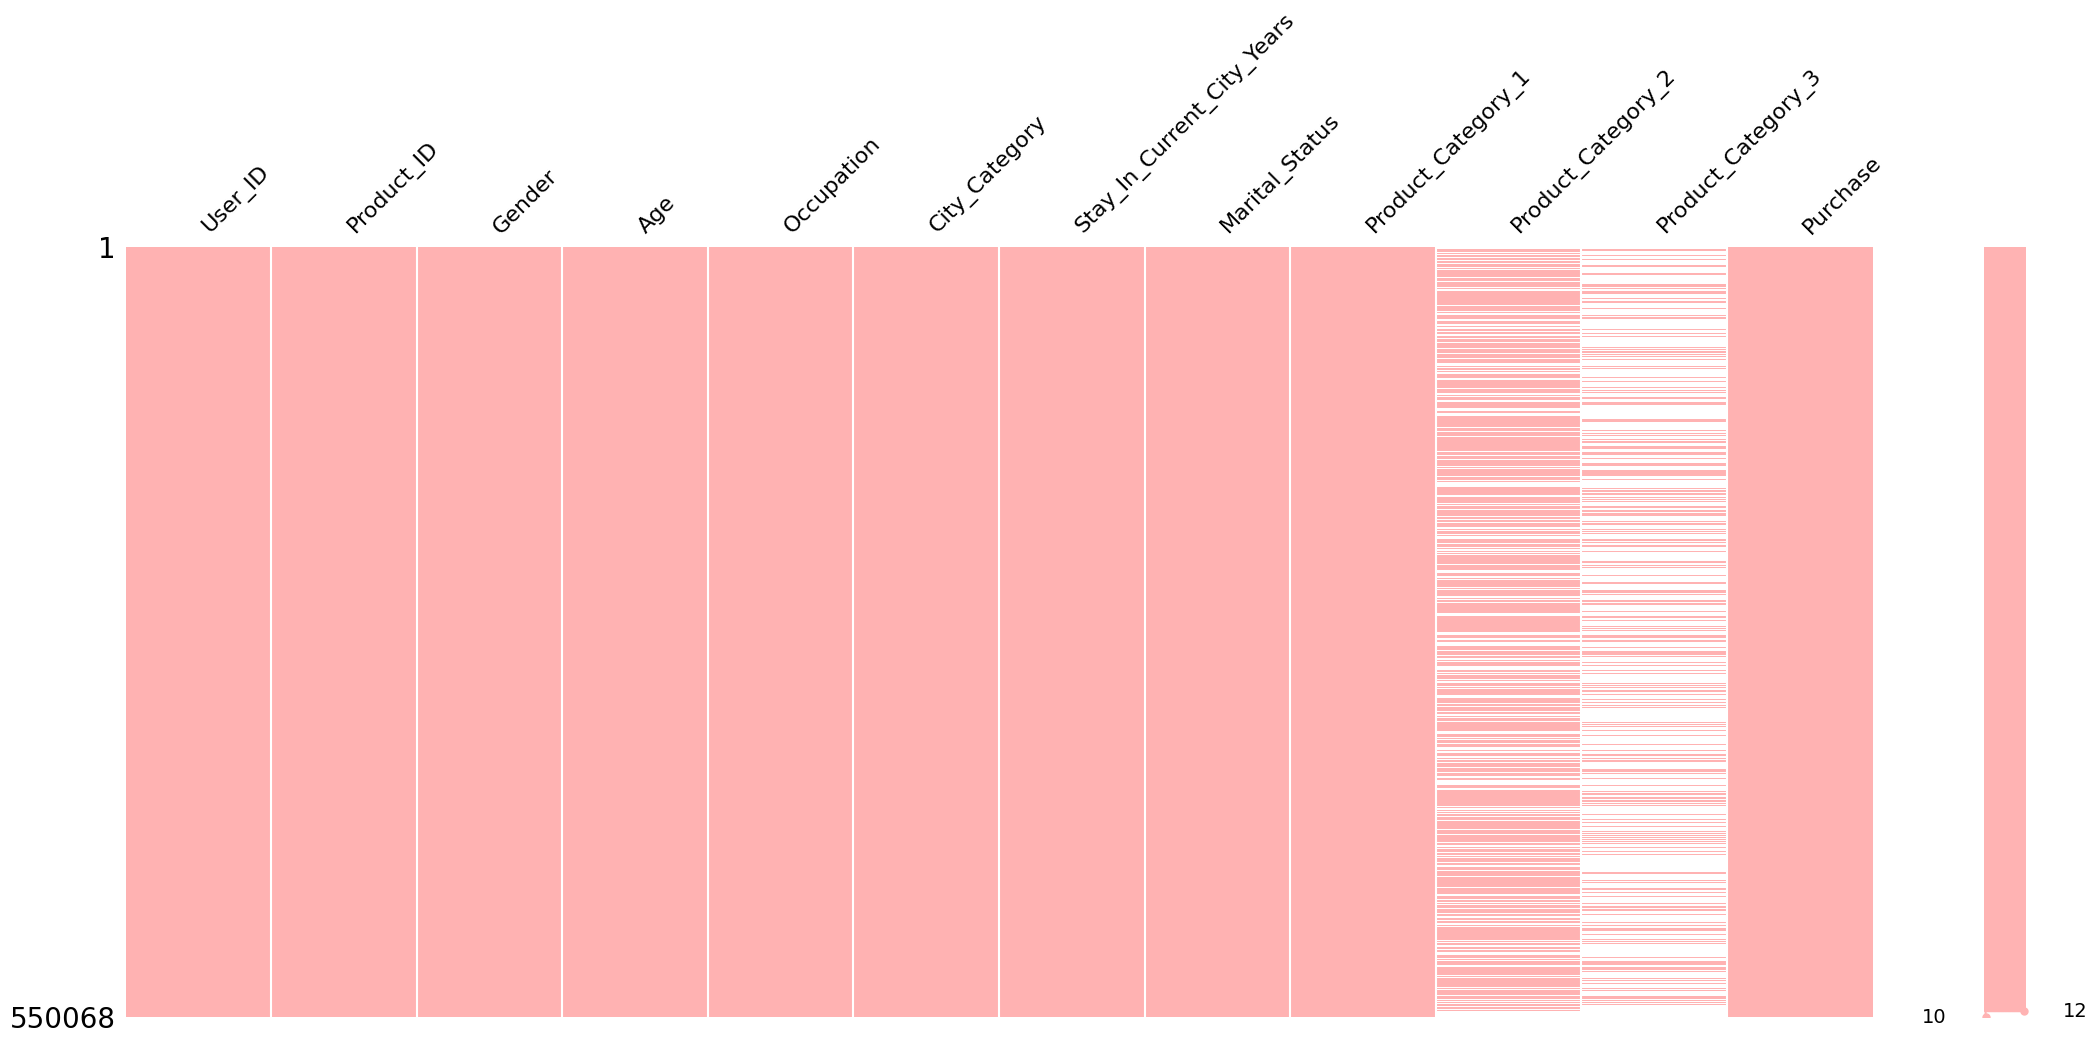

In [7]:
msno.matrix(df, color=(1, 0.7, 0.7))

This plot shows the proportion of missing values for each column in the form of a bar chart. It helps to identify columns with a high percentage of missing data.

<AxesSubplot: >

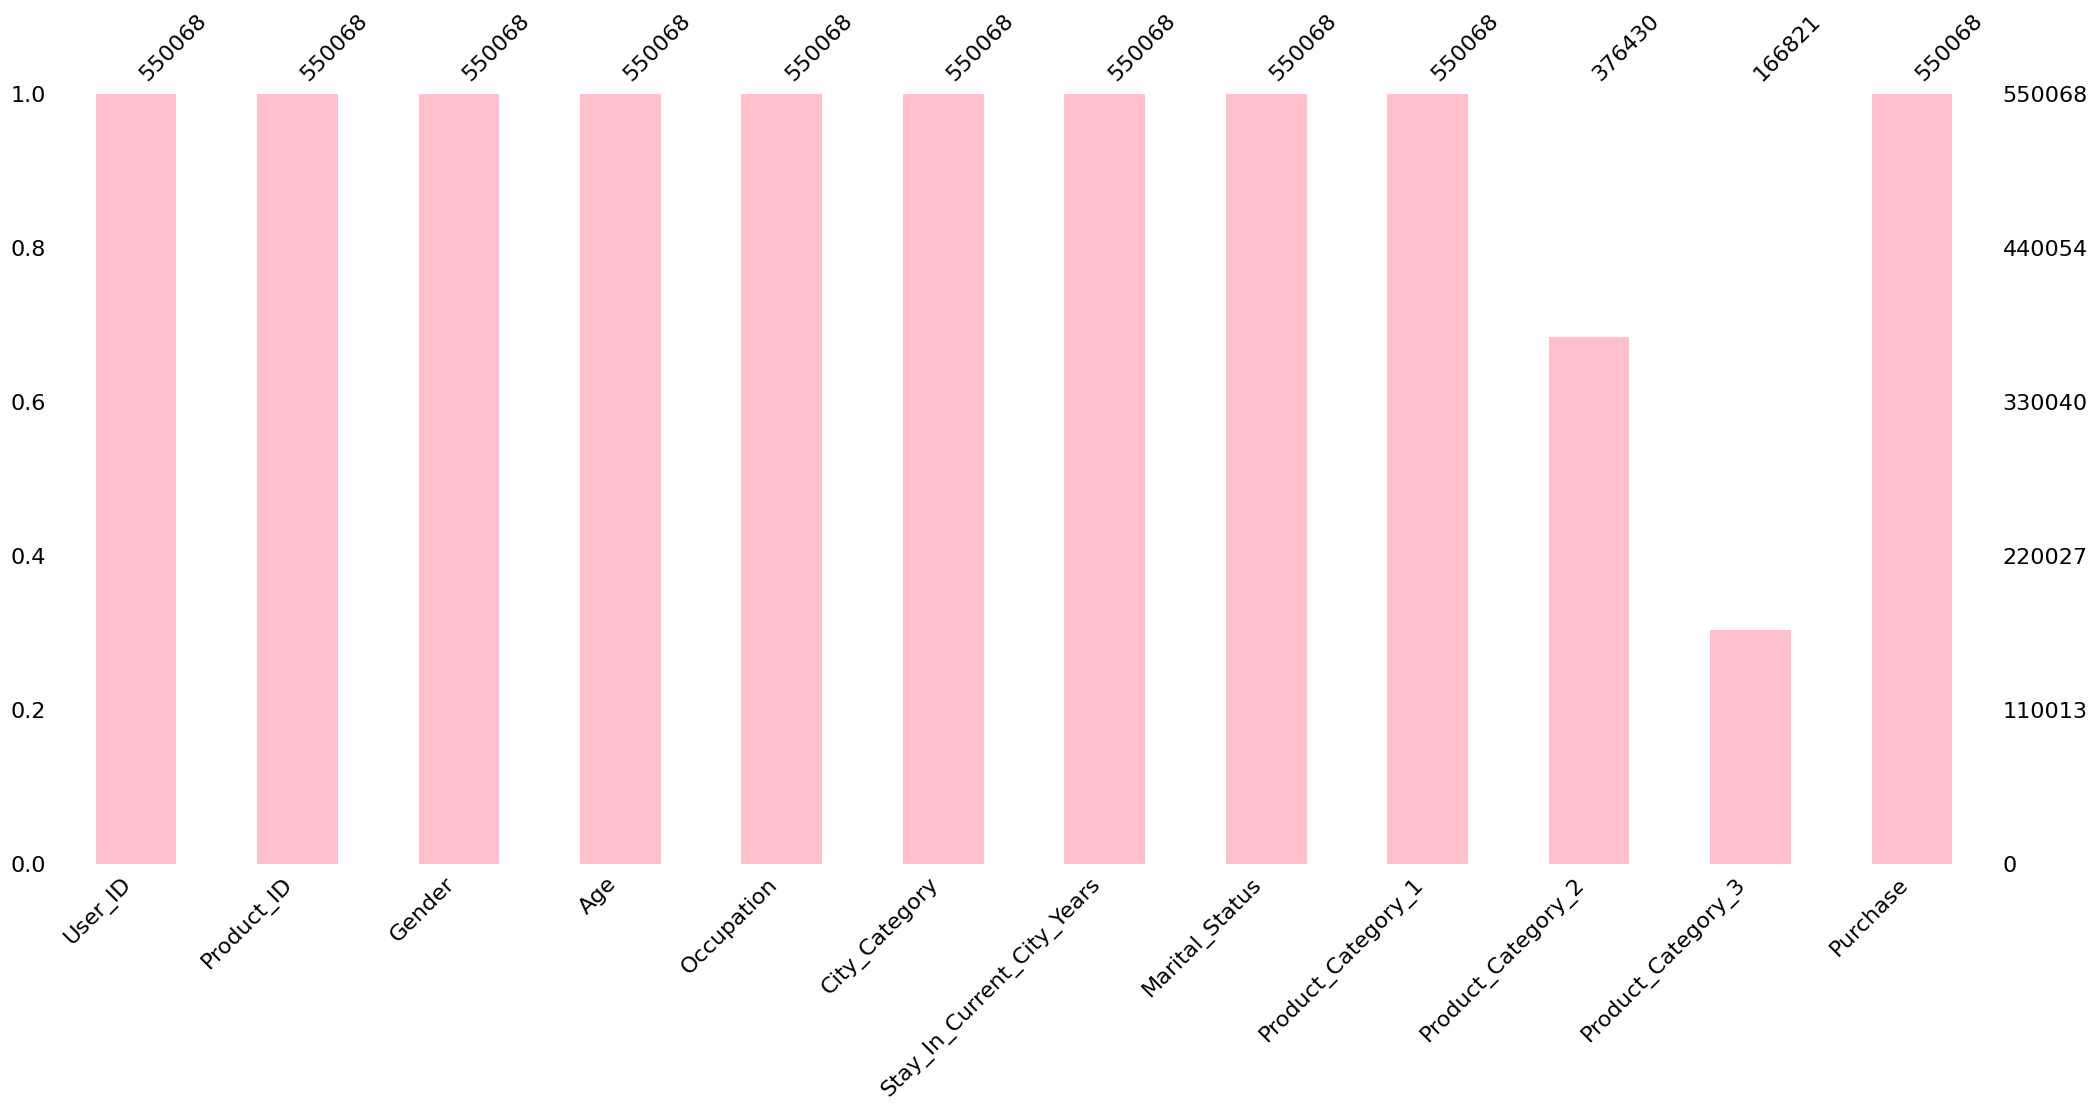

In [8]:
msno.bar(df,color='pink')

 Count of the number of unique values in each column.

In [9]:
for column in df.columns:
    unique_values_count = df[column].nunique()
    print(f"Number of Unique Values in '{column}': {unique_values_count}")


Number of Unique Values in 'User_ID': 5891
Number of Unique Values in 'Product_ID': 3631
Number of Unique Values in 'Gender': 2
Number of Unique Values in 'Age': 7
Number of Unique Values in 'Occupation': 21
Number of Unique Values in 'City_Category': 3
Number of Unique Values in 'Stay_In_Current_City_Years': 5
Number of Unique Values in 'Marital_Status': 2
Number of Unique Values in 'Product_Category_1': 20
Number of Unique Values in 'Product_Category_2': 17
Number of Unique Values in 'Product_Category_3': 15
Number of Unique Values in 'Purchase': 18105


Check for outliers.

In [10]:
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Purchase'] < lower_bound) | (df['Purchase'] > upper_bound)]
print("Potential Outliers:")
print(outliers)

Potential Outliers:
        User_ID Product_ID Gender    Age  Occupation City_Category  \
343     1000058  P00117642      M  26-35           2             B   
375     1000062  P00119342      F  36-45           3             A   
652     1000126  P00087042      M  18-25           9             B   
736     1000139  P00159542      F  26-35          20             C   
1041    1000175  P00052842      F  26-35           2             B   
...         ...        ...    ...    ...         ...           ...   
544488  1005815  P00116142      M  26-35          20             B   
544704  1005847  P00085342      F  18-25           4             B   
544743  1005852  P00202242      F  26-35           1             A   
545663  1006002  P00116142      M  51-55           0             C   
545787  1006018  P00052842      M  36-45           1             C   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
343                             3               0                 

# Data Visualisation

This plot displays the Purchase distribution and outliers in the Purchase column.

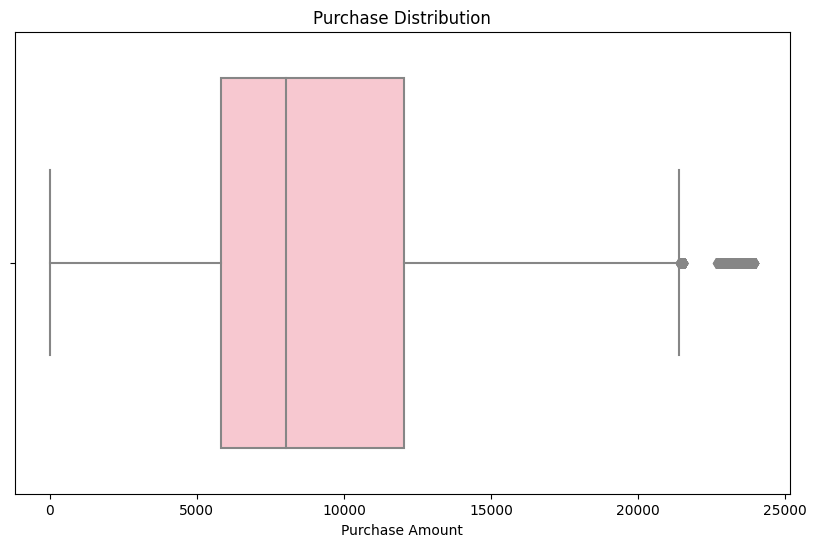

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Purchase'], color='pink')
plt.title('Purchase Distribution')
plt.xlabel('Purchase Amount')
plt.show()

Count of Gender, Marital Status and Occupation

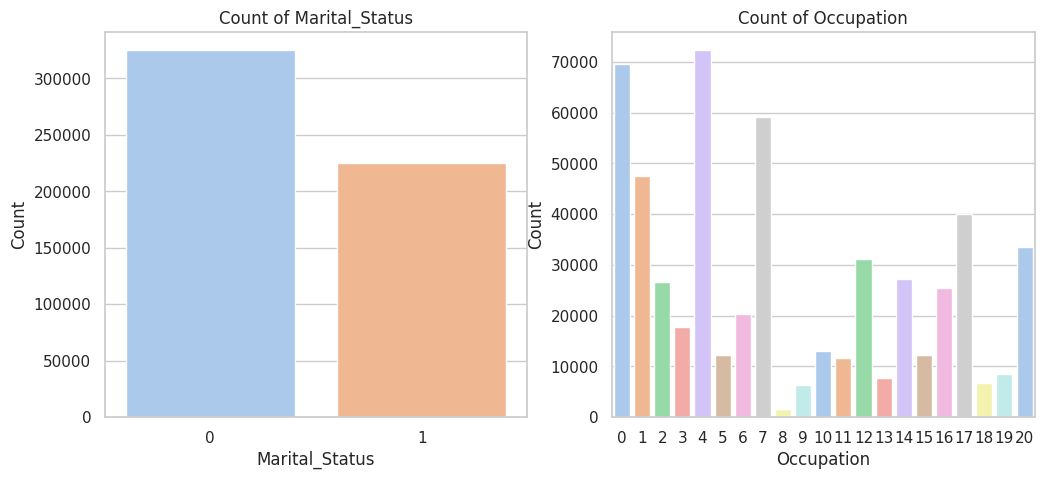

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)

sns.countplot(x='Marital_Status', data=df, palette='pastel')
plt.title('Count of Marital_Status')
plt.xlabel('Marital_Status')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.countplot(x='Occupation', data=df, palette='pastel')
plt.title('Count of Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

Analysis of City and Occupation by Purchase and City Category piechart.

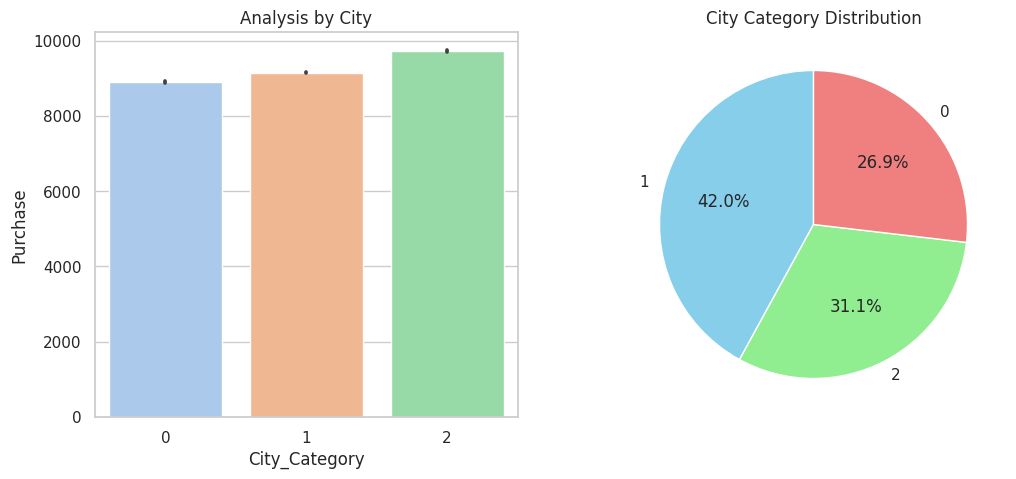

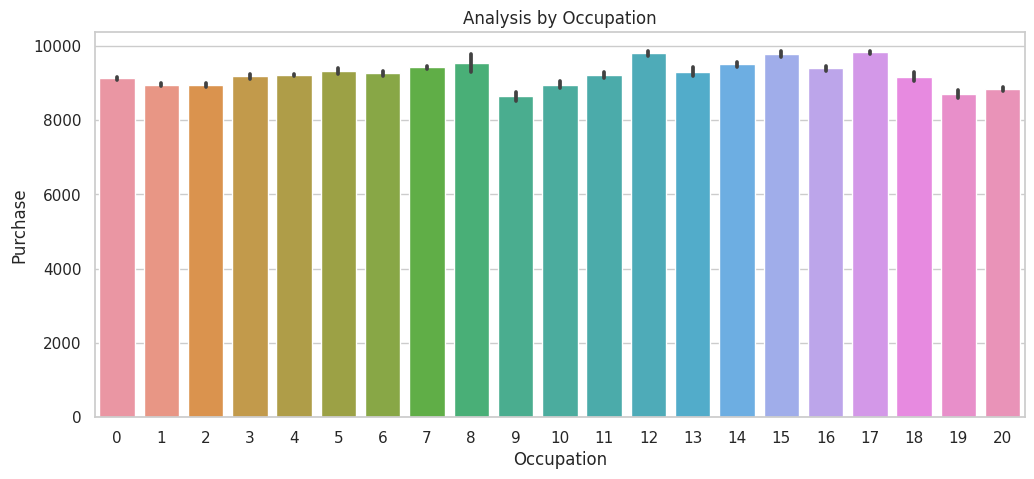

In [34]:
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

sns.barplot(x='City_Category', y='Purchase', data=df)
plt.title('Analysis by City')
plt.xlabel('City_Category')
plt.ylabel('Purchase')

plt.subplot(1, 2, 2)
# Count the occurrences of each city category
city_category_counts = df['City_Category'].value_counts()
plt.pie(city_category_counts, labels=city_category_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('City Category Distribution')
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x='Occupation', y='Purchase', data=df)
plt.title('Analysis by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Purchase')
plt.show()

This plot displays count of Age by gender and by Purchase.

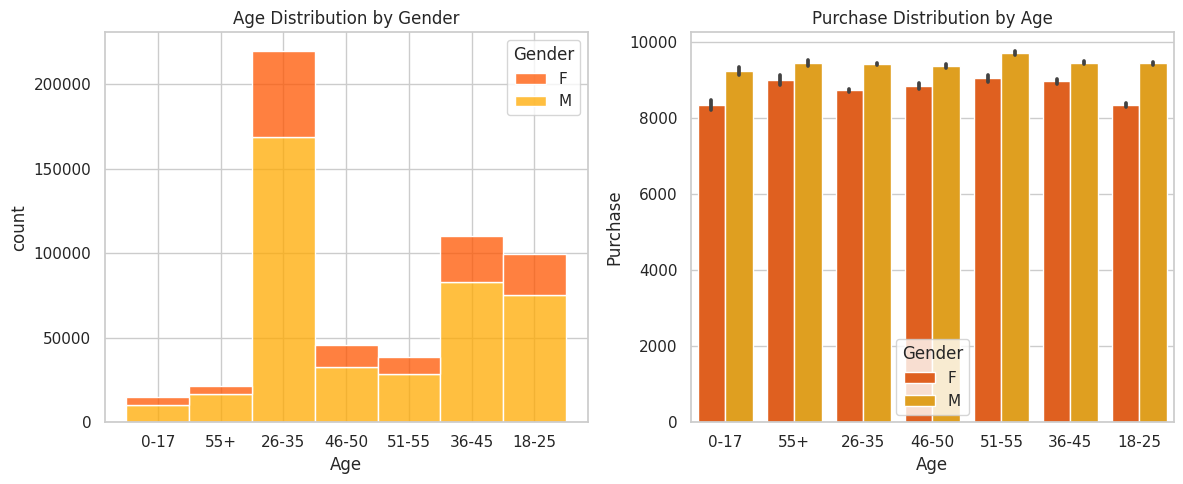

In [14]:
plt.figure(figsize=(12, 5))

# First subplot (sns.histplot)
plt.subplot(1, 2, 1)

sns.histplot(data=df, x='Age',hue='Gender',multiple='stack',palette='autumn')

plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('count')

# Second subplot (sns.barplot)
plt.subplot(1, 2, 2)
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df,palette='autumn')

plt.title('Purchase Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Purchase')

# Show the plots
plt.tight_layout()
plt.show()

Heatmap shows the correlation between numerical values.

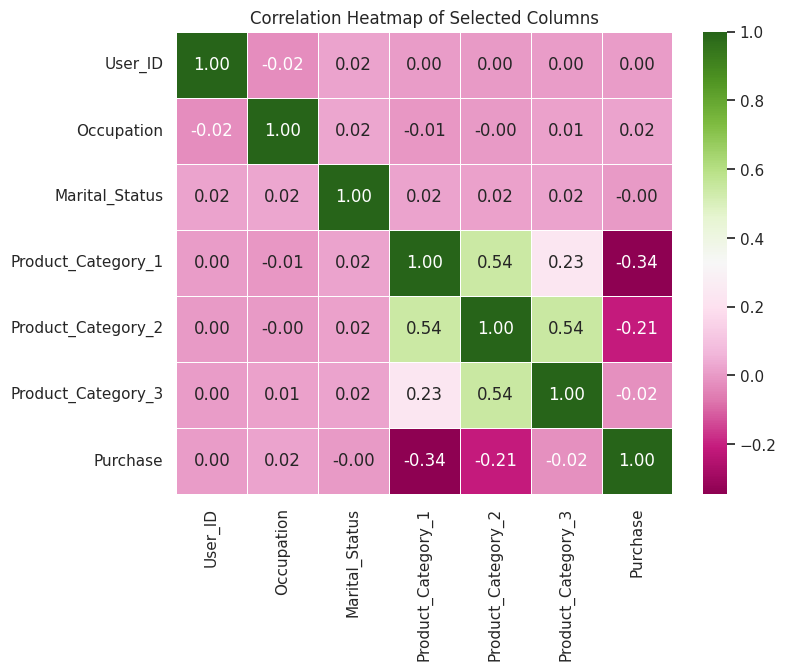

In [17]:
# Select columns for the heatmap
selected_columns = ['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']

# Create a subset DataFrame with selected columns
subset_df = df[selected_columns]

# Calculate the correlation matrix for selected columns
correlation_matrix = subset_df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Columns')
plt.show()

The chi-square test (χ² test) is a statistical test used to assess the relationship between two categorical variables. This test evaluates the differences between observed and expected frequencies and determines whether these differences are statistically significant, indicating whether they are likely due to random chance.

In the context provided, the assumption is made that the missing data is Missing Completely At Random (MCAR). In this case, the null hypothesis is accepted, stating that the missing data occurs randomly.

If the p-value of the test is greater than a specified significance level (alpha), it suggests that there is not enough evidence to reject the null hypothesis. Therefore, the conclusion is that the missing data is considered to be random. This means that the missing values occur completely by chance, and there is no association with any other variable or feature.

On the other hand, rejecting the null hypothesis would imply that the missing data is not random and is associated with another variable. This could indicate a systematic pattern in the occurrence of missing values, suggesting a relationship with another variable.

In [18]:
observated_values=df.iloc[:,[9,10]].sum()
chi2,p_values,_,_ =chi2_contingency(observated_values)

alpha=0.05
if p_values<alpha:
    print("Hipotez reddedildi: Veriler MCAR değil.")
else:
    print("Hipotez kabul edildi: Veriler MCAR.")

Hipotez kabul edildi: Veriler MCAR.


# Training the Data

In this code block the data types were converted into numeric values using LabelEncoder.  Nan values were exluded from label encoder function because this function converts nan values into numerical values as well.

In [20]:
from sklearn.preprocessing import LabelEncoder
columns=['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status',
       'Purchase']
for column in df[columns]:
    if df[column].dtype== object or df[column].dtype== float:
        encoder = LabelEncoder()

        df[column] = encoder.fit_transform(df[column])

In [21]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,672,0,0,10,0,2,0,3,NaN,NaN,8370
1,1000001,2376,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,852,0,0,10,0,2,0,12,NaN,NaN,1422
3,1000001,828,0,0,10,0,2,0,12,14.0,NaN,1057
4,1000002,2734,1,6,16,2,4,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,3567,1,5,13,1,1,1,20,NaN,NaN,368
550064,1006035,3568,0,2,1,2,3,0,20,NaN,NaN,371
550065,1006036,3568,0,2,15,1,4,1,20,NaN,NaN,137
550066,1006038,3568,0,6,1,2,2,0,20,NaN,NaN,365


This code essentially uses a machine learning model (K-nearest neighbors regression) to predict and fill missing values in the 'Product_Category_3' and 'Product_Category_2' columns based on the available data in the DataFrame.

In [36]:
product_2_drop=df.drop('Product_Category_2',axis=1)

X = product_2_drop.dropna(subset=['Product_Category_3'], axis=0)
y = X['Product_Category_3']
X = X.drop('Product_Category_3', axis=1)

model=KNeighborsRegressor(n_neighbors=8)
model.fit(X,y)

predictions = model.predict(product_2_drop.drop('Product_Category_3', axis=1))
df['Product_Category_3'].fillna(pd.Series(predictions), inplace=True)
df['Product_Category_3'] = [round(num) for num in df['Product_Category_3']]

In [38]:
X_2 = df.dropna(subset=['Product_Category_2'], axis=0)
y_2 = X_2['Product_Category_2']
X_2 = X_2.drop('Product_Category_2', axis=1)

model=KNeighborsRegressor(n_neighbors=8)
model.fit(X_2,y_2)

predictions = model.predict(df.drop('Product_Category_2', axis=1))
df['Product_Category_2'].fillna(pd.Series(predictions), inplace=True)
df['Product_Category_2'] = [round(num) for num in df['Product_Category_2']]

Conclusion

In [39]:
 df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,672,0,0,10,0,2,0,3,6,12,8370
1,1000001,2376,0,0,10,0,2,0,1,6,14,15200
2,1000001,852,0,0,10,0,2,0,12,13,11,1422
3,1000001,828,0,0,10,0,2,0,12,14,13,1057
4,1000002,2734,1,6,16,2,4,0,8,14,12,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,3567,1,5,13,1,1,1,20,12,14,368
550064,1006035,3568,0,2,1,2,3,0,20,12,14,371
550065,1006036,3568,0,2,15,1,4,1,20,14,14,137
550066,1006038,3568,0,6,1,2,2,0,20,12,14,365


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=53e9cd43-79fe-4ad9-a4ae-a105973b9c59' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>